<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [6]:
df = pd.read_csv('states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [9]:
print(df.shape)

(1715, 25)


In [10]:
print(df.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


Chosen test: **`Math 4th Grade`**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [15]:
# renaming columns for easier naming convension

df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [16]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [19]:
# find the number of missing values in each column (means the ones that are NaNs)
df.isna().sum() 

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
EXPENDITURE_PER_4_GRADER         440
dtype: int64

In [20]:
# to find the number of valid values in each column (means the ones that are NOT NaNs)
df.notna().sum()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
EXPENDITURE_PER_4_GRADER        1275
dtype: int64

In [21]:
# checking total number of rows in the dataframe to find how many have missing data
df.count()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
EXPENDITURE_PER_4_GRADER        1275
dtype: int64

In [22]:
# checking what will I be left with if i drop all rows containing NaNs
# df.dropna().count()
# Since I was left with only 355 rows, not dropping NaNs everywhere. Will just do it for 4th graders

PRIMARY_KEY                     355
STATE                           355
YEAR                            355
ENROLL_ALL_EST                  355
TOTAL_REVENUE                   355
FEDERAL_REVENUE                 355
STATE_REVENUE                   355
LOCAL_REVENUE                   355
TOTAL_EXPENDITURE               355
INSTRUCTION_EXPENDITURE         355
SUPPORT_SERVICES_EXPENDITURE    355
OTHER_EXPENDITURE               355
CAPITAL_OUTLAY_EXPENDITURE      355
ENROLL_PREK                     355
ENROLL_KINDER                   355
ENROLL_4                        355
ENROLL_8                        355
ENROLL_12                       355
ENROLL_PRIMARY                  355
ENROLL_HS                       355
ENROLL_ALL                      355
AVG_MATH_4_SCORE                355
AVG_MATH_8_SCORE                355
AVG_READING_4_SCORE             355
AVG_READING_8_SCORE             355
EXPENDITURE_PER_4_GRADER        355
dtype: int64

In [25]:
# I want all 4th grader reading score rows to have average reading 4 score data, removing rows missing AVG_READING_4_SCORE
# and then checking how many rows I am left with

#df.dropna(subset=['AVG_READING_4_SCORE'], inplace=False).count()

# By doing this, I am left with only 521 rows. So, for now, I will not do this. Will check if i can replace NaNs
#in 4th grader reading score from another columns

PRIMARY_KEY                     650
STATE                           650
YEAR                            650
ENROLL_ALL_EST                  481
TOTAL_REVENUE                   523
FEDERAL_REVENUE                 523
STATE_REVENUE                   523
LOCAL_REVENUE                   523
TOTAL_EXPENDITURE               523
INSTRUCTION_EXPENDITURE         523
SUPPORT_SERVICES_EXPENDITURE    523
OTHER_EXPENDITURE               481
CAPITAL_OUTLAY_EXPENDITURE      523
ENROLL_PREK                     569
ENROLL_KINDER                   574
ENROLL_4                        574
ENROLL_8                        574
ENROLL_12                       574
ENROLL_PRIMARY                  441
ENROLL_HS                       492
ENROLL_ALL                      574
AVG_MATH_4_SCORE                521
AVG_MATH_8_SCORE                521
AVG_READING_4_SCORE             650
AVG_READING_8_SCORE             562
EXPENDITURE_PER_4_GRADER        523
dtype: int64

In [32]:
# to find if the individual enrollments sum up to total enrollment

(df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS).describe()

count       438.000000
mean       5572.116438
std       18771.688566
min           0.000000
25%           0.000000
50%           0.000000
75%        1661.250000
max      156439.000000
dtype: float64

In [34]:
df.ENROLL_ALL.isna().sum()   # this returned 76 rows

76

In [35]:
(df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS).describe()

count       438.000000
mean       5572.116438
std       18771.688566
min           0.000000
25%           0.000000
50%           0.000000
75%        1661.250000
max      156439.000000
dtype: float64

In [36]:
# enrollment differences as a percent
((df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS)/df.ENROLL_ALL*100).describe()

count    438.000000
mean       0.480138
std        1.165665
min        0.000000
25%        0.000000
50%        0.000000
75%        0.234742
max        7.702014
dtype: float64

In [37]:
# missing ENROLL_ALL has missing all other enrollment data as well. To confirm:
df[df.ENROLL_ALL.isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PRIMARY    False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [38]:
# find rows with enrollment estimates
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

93

In [39]:
# let's see if we can fill these in
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    481.000000
mean       0.027597
std        0.054886
min       -0.096404
25%        0.004437
50%        0.014650
75%        0.031764
max        0.450693
dtype: float64

In [40]:
# filling missing estimates
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [41]:
# to check if we have any rows with missing data
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum() 

0

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [56]:
# I want to know what is the percentage of expenditure spent on 4th graders

df['EXPENDITURE_PER_4_GRADER'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_4']

# also creating variable which represents expenditure per student

df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **Created EXPENDITURE_PER_4_GRADER: so that I can check what percentage is spent on 4th grader**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade reading scores')

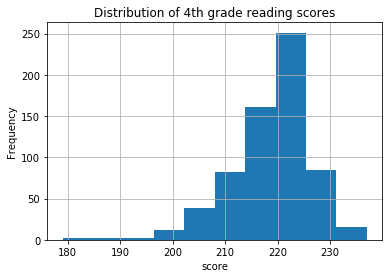

In [43]:
df.AVG_READING_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade reading scores')

**Distribution of 4th grade reading scores**

Visualization 2

Text(0.5, 1.0, '4th grade reading score over time')

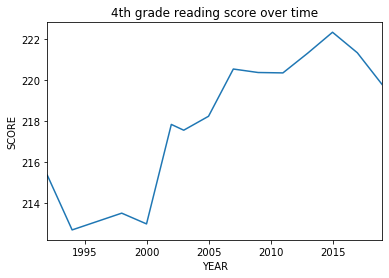

In [44]:
df.groupby('YEAR').AVG_READING_4_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('4th grade reading score over time')

**4th grade reading score over time**

In [45]:
# 4th grade reading score over time, by State

Text(0.5, 1.0, '4th grade reading score over time, by state')

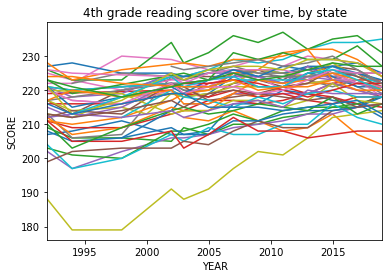

In [46]:
df.set_index('YEAR').groupby('STATE').AVG_READING_4_SCORE.plot()
plt.ylabel('SCORE')
plt.title('4th grade reading score over time, by state')

Text(0, 0.5, '4th grade reading score')

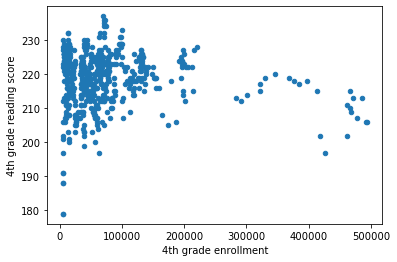

In [47]:
df.plot.scatter(x='ENROLL_4',y='AVG_READING_4_SCORE')
plt.xlabel('4th grade enrollment')
plt.ylabel('4th grade reading score')

Text(0, 0.5, '4th grade reading score')

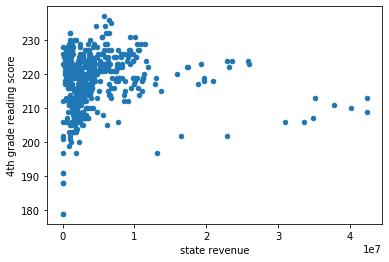

In [48]:
df.plot.scatter(x='STATE_REVENUE',y='AVG_READING_4_SCORE')
plt.xlabel('state revenue')
plt.ylabel('4th grade reading score')

Text(0, 0.5, '4th grade reading score')

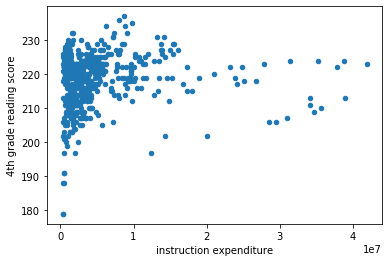

In [50]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE',y='AVG_READING_4_SCORE')
plt.xlabel('instruction expenditure')
plt.ylabel('4th grade reading score')

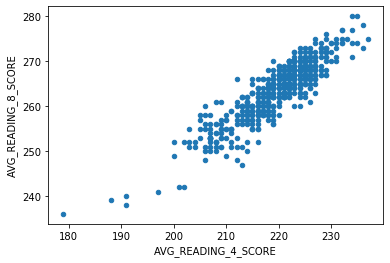

In [52]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_READING_8_SCORE')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [53]:
from sklearn.model_selection import train_test_split

In [76]:
X = df[['TOTAL_REVENUE','ENROLL_4','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [77]:
# using 25% of the data for testing test_size=.25

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [83]:
# import your sklearn class here - Using liner regression as this is new to me
from sklearn.linear_model import LinearRegression

In [84]:
# create your model here
model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_pred = model.predict(X_train)

In [102]:
# to find intercept and coefficient

print(model.intercept_)
print(model.coef_)

-136.83201433039926
[ 3.16494764e-07 -5.36408594e-05  4.23469765e-01  1.77001481e-01]


In [103]:
# checking R**2 value to find how well a linear model fits the data
model.score(X_train, y_train)

0.16596478404725856

In [104]:
# to calculate mean error
np.mean(model.predict(X_train)-y_train)

2.1606299515970394e-14

In [105]:
# calculate mean absolute error
np.mean(np.abs(model.predict(X_train)-y_train))

5.336772674267017

In [106]:
# calculating root mean squared error -- penalizes large errors
np.mean((model.predict(X_train)-y_train)**2)**0.5

6.882824256081429

In [96]:
# for classification:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)

Text(0, 0.5, 'Reading 4th Grader score')

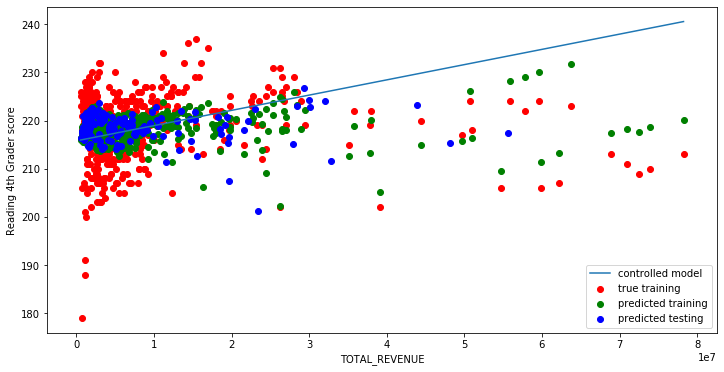

In [97]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4th Grader score')

<h2> Summary </h2>

**Used Liner Regression model for this. Few observations:

1. This model resulted in R-squared value of 0.16596478404725856, which is very low and indicates that the model doesn't fit well. (If the model fits well, R-squared value should be >0.9)
2. Root Mean Square Error (RMSE) is 6.882824256081429 for the training data. It tells you how concentrated the data is around the line of best fit. RMSE values closer to zero are better. Since it is 6.88 far from 0, it indicates that linear regression model for predicting 4th grader score in reading is not a good model. 
3. From the graph visualization of the linear model we can see that the most of the data is skewed to the left and rest of the data is below the model an not around it. This also indicates that another model should be used.


Note to the evaluators:
=======================
In the interest of time and being new to ML, just used linear model as was discussed in the tutorial. I would however, will be using another model to check which model fits better and share it with the group. 
**